## Integrace funkce jedn√© promƒõnn√©


V tomto cviƒçen√≠ si nejprve vyzkou≈°√≠me nal√©zt primitivn√≠ funkci k zadan√© funkci pomoc√≠ symbolick√© manipulace a n√°slednƒõ si vyzkou≈°√≠me spoƒç√≠tat urƒçit√Ω integr√°l pomoc√≠ lichobƒõ≈æn√≠kov√©ho pravidla z Newton-Cotesov√Ωch vzorc≈Ø.

#### CACv.11.1: Neurƒçit√Ω integr√°l

Naleznƒõte primitivn√≠ funkci k zadan√© funkci (tzn. ≈ôe≈°te neurƒçit√Ω integr√°l zadan√© funkce).
$$
F(x) = \int (-3x^2+4x+5)dx
$$

Pro v√Ωpoƒçet neurƒçit√©ho integr√°lu vyu≈æijeme modul sympy, kter√Ω nen√≠ souƒç√°st√≠ standardn√≠ knihovny jazyka Python3 a je nutn√© ho instalovat p≈ôes bal√≠ƒçkovac√≠ syst√©m pip.

Manu√°l: [Sympy](https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [3]:
!python3 -m pip install sympy
import sympy

Python se nepovedlo najÔøΩt. Spu


In [1]:
import sympy
x = sympy.Symbol("x")
sympy.integrate(-3*x**2 + 4*x + 5, x)

-x**3 + 2*x**2 + 5*x

#### CACv.11.2: Urƒçit√Ω integr√°l

Spoƒç√≠tejte n√°sleduj√≠c√≠ urƒçit√Ω integr√°l na zadan√©m intervalu.
$$
F(x) = \int_{0}^{3} (-3x^2+4x+5)dx
$$


V√Ωpoƒçet provedeme pomoc√≠ lichobƒõ≈æn√≠kov√© integrace. Pro procviƒçen√≠ provedeme integraci nejprve naivn√≠m zp≈Øsobem, n√°slednƒõ ve formƒõ Newton-Cotesovo vzorce a na z√°vƒõr pomoc√≠ knihovny numpy.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

def f(x): 
    return -3*x**2 + 4*x + 5
   
a = 0
b = 3

 #analytick√© ≈ôe≈°en√≠: I(-3x2 + 4x + 5)(a,b) = [-x3 + 2x2 + 5x](0,3) = -27 + 18 + 15 = 6

integrace lichobƒõ≈æn√≠kov√Ωm pravidlem

<img src="data/s11_trap.png" alt="Drawing" style="width: 400px;"/>

6.007499999999993


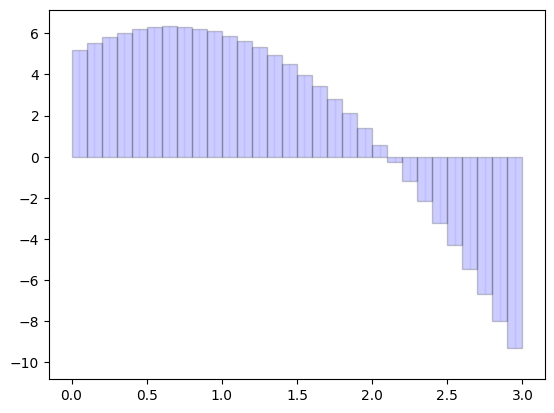

In [5]:
dx = 0.1

integral = 0
x = a
i = 0
fig, ax = plt.subplots()                        # vytvo≈ôen√≠ grafu
while x < b:
    xp = (x + x+dx) / 2
    height = f(xp)                              # v√Ω≈°ka obd√©ln√≠k≈Ø jako funkƒçn√≠ hodnota st≈ôedu intervalu
    #height = (f(x) + f(x + dx)) / 2            # lichobƒõ≈æn√≠k

    rectangle = Rectangle((x, 0), dx, height, edgecolor='black', facecolor='blue', alpha=0.2)
    line = Rectangle((xp, 0), 0, height, edgecolor='b', facecolor='none', alpha=0.07)

    integral += dx * height
    ax.add_patch(rectangle)
    ax.add_patch(line)
    x += dx

ax.plot(x,f(x))
print(integral)
plt.show()


5.984999999999994


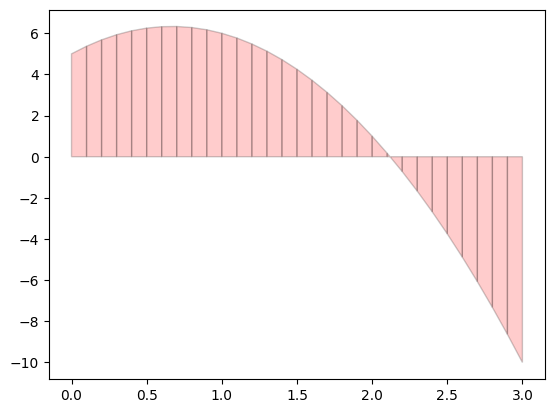

In [8]:
dx = 0.1

integral = 0
x = a
i = 0
fig, ax = plt.subplots()                        # vytvo≈ôen√≠ grafu
while x < b:
    integral += dx * (f(x) + f(x+dx))/2

    # Vykreslen√≠ d√≠lƒç√≠ho lichobƒõ≈æn√≠ku
    trapezoid = Polygon([(x,0), (x,f(x)), (x+dx,f(x+dx)), (x+dx,0)], 
                       closed=True, edgecolor='black', facecolor='red', alpha=0.2)
    ax.add_patch(trapezoid)
    x += dx

ax.plot(x,f(x))
print(integral)
plt.show()


integrace ve formƒõ Newtonov√Ωch-Cotesov√Ωch vzorc≈Ø
$$
S = h \left[\frac{f(a) + f(b)}{2}\right] + h\sum_{i=1}^{n-1} f(x_i)
$$

In [9]:
n = int((b-a)//dx)+1                # poƒçet dƒõlen√≠
integral = f(a) + f(b)              # n√°soben√≠ h/2 a≈æ na konci
for i in range(1, n):
    integral += 2*f(a+i*dx)
integral *= dx/2
print(integral)

5.984999999999998


pomoc√≠ knihovny numpy

In [ ]:
!python3 -m pip install numpy

In [10]:
import numpy as np
x = np.arange(a, b+dx, dx)
y = f(x)
print(np.trapz(y, dx=dx))               # trapezoid - lichobƒõ≈æn√≠k

5.984999999999999


pomoc√≠ knihovny scipy

In [ ]:
!python3 -m pip install scipy

In [ ]:
# pro apple silicon architektury
!python3 -m pip install --pre -i https://pypi.anaconda.org/scipy-wheels-nightly/simple scipy

In [11]:
from scipy import integrate

In [15]:
# trapezoid
print(integrate.trapezoid(y, x=x))          # prvn√≠ argument v≈ædy funkce ve formƒõ pole, druh√Ω pole x
print(integrate.trapezoid(y, dx=dx))        # druh√Ω argument ≈°√≠≈ôka vzorkov√°n√≠

5.985
5.984999999999999


In [16]:
# simpson
x = np.arange(a, b+dx, dx)
y = f(x)
print(integrate.simpson(y=y, x=x))          # argumenty stejn√© jako trapezoid
print(integrate.simpson(y=y, dx=dx))

6.000000000000002
5.999999999999996


In [19]:
# romberg
print(integrate.romberg(f, a, b))           # funkce, ne pole

6.0


In [81]:
# gaussian
print(integrate.quadrature(f, a, b))

(5.9999999999999964, 1.1546319456101628e-14)


### Samostatn√° cviƒçen√≠

#### SCv.11.1: Symbolick√° matematika

Pomoc√≠ symbolick√© matematiky vypoƒç√≠tejte n√°sleduj√≠c√≠ integr√°ly. Zkuste p≈ôedem odhadnout podm√≠nky integrace a existence primitivn√≠ funkce.
$$
F(x) = \int_{-\infty}^{\infty} e^{-ax^2} {\rm d}x
$$

In [12]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

Piecewise((sqrt(pi)*erf(sqrt(a)*x)/(2*sqrt(a)), Ne(a, 0)), (x, True))

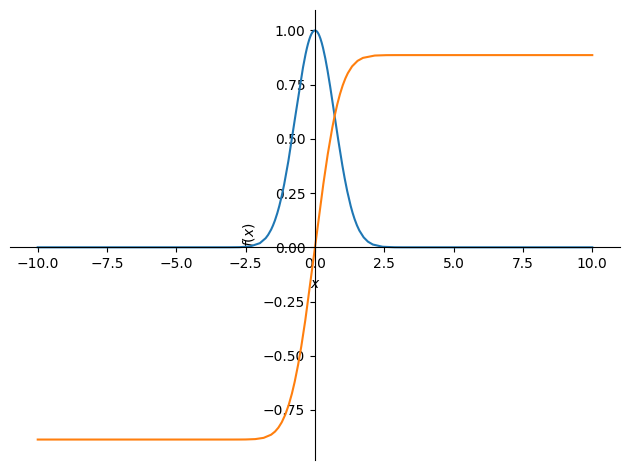

In [15]:
x = sympy.Symbol("x")
a = sympy.Symbol("a")
f = sympy.exp(-a*x**2)
#sympy.Integral(f, x).doit()        # pouze v√Ωpis, v√Ωpoƒçet p≈ôes doit()
F = sympy.integrate(f, x)
display(F)
#sympy.integrate(f, (x, -np.inf, np.inf))

#f_np = sympy.lambdify(x, f.subs(a, 1), 'numpy')  # Vytvo≈ôen√≠ funkce pro vyhodnocen√≠ v√Ωrazu
a0 = 1
sympy.plot(f.subs(a, a0), F.subs(a, a0))

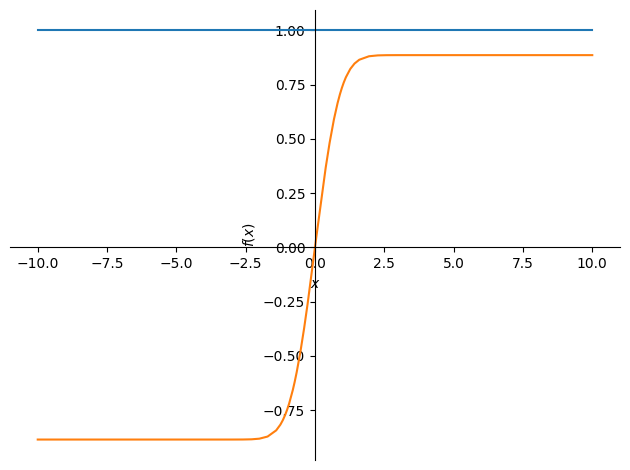

In [16]:
# pro a = 0 je v√Ωsledek jin√Ω

# Definice symbolick√Ωch promƒõnn√Ωch
x = sympy.Symbol("x")
a = sympy.Symbol("a")
F = sympy.sqrt(sympy.pi)/2*sympy.erf(x)

a0 = 0
sympy.plot(f.subs(a, a0), F.subs(a, a0))

$$
F(x) = \int x^a {\rm d}x
$$

Piecewise((x**(a + 1)/(a + 1), Ne(a, -1)), (log(x), True))

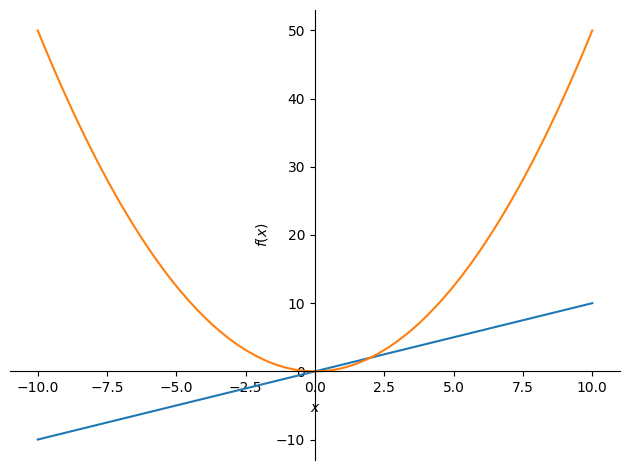

In [20]:
x = sympy.Symbol("x")
a = sympy.Symbol("a")
f = x**a
F = sympy.integrate(f, x)
display(F)

a0 = 1
sympy.plot(f.subs(a, a0), F.subs(a, a0))

$$
F(x) = \int \arccos(\sin x) {\rm d}x
$$

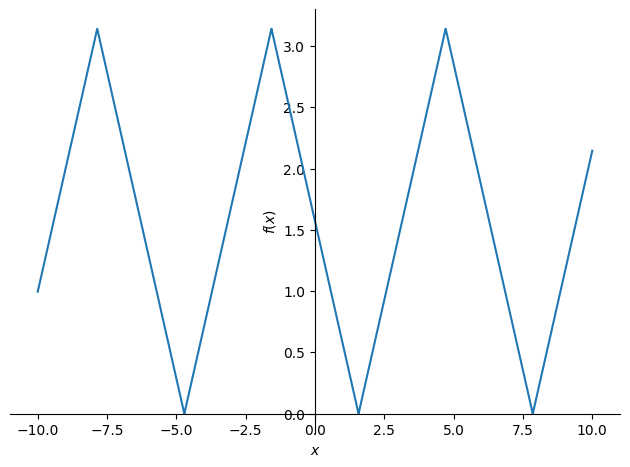

In [21]:
x = sympy.Symbol("x")
f = sympy.acos(sympy.sin(x))
sympy.plot(f)

In [97]:
# selh√°n√≠ analytick√© metody (v√Ωpoƒçet trv√° kolem minuty)
x = sympy.Symbol("x")
f = sympy.acos(sympy.sin(x))
F = sympy.integrate(f, x)
display(F)

Integral(acos(sin(x)), x)

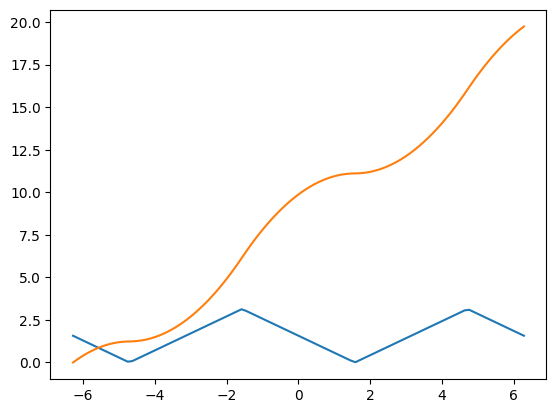

In [22]:
# vykreslen√≠ primitivn√≠ fce pomoc√≠ numerick√© metody
from scipy import integrate

def f(x):                                                   # definice funkce arccos(sin(x))
    return np.arccos(np.sin(x))

xs = np.linspace(-2*np.pi, 2*np.pi, 100)                    # testovac√≠ hodnoty x

#F_values = integrate.cumtrapz(f(xs), xs, initial=0)         # zastaral√° metoda
Fs = integrate.cumulative_trapezoid(f(xs), xs, initial=0)   # vypoƒçet primitivn√≠ funkce numericky

plt.plot(xs, f(xs))                                         # vykreslen√≠ f
plt.plot(xs, Fs)                                            # vykreslen√≠ F
plt.show()


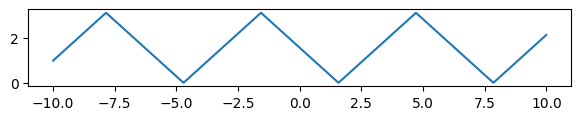

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):                               # definice funkce arccos(sin(x))
    x_mod = (x - np.pi/2) % (2 * np.pi)     # periodick√© roz≈°√≠≈ôen√≠ na cel√Ω definiƒçn√≠ obor
    if 0 <= x_mod <= np.pi:
        return x_mod
    else:
        return 2*np.pi - x_mod

xs = np.linspace(-10, 10, 1000)
ys = np.array([f(x) for x in xs])

# Vykreslen√≠ grafu
plt.figure(figsize=(7, 1))
plt.plot(xs, ys)
plt.show()


$$
F(x) = \int \ln(\sin x) {\rm d}x
$$

Integral(log(sin(x)), x)


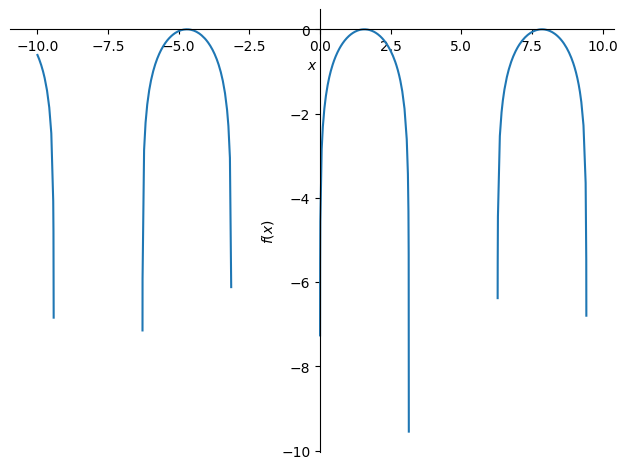

In [25]:
x = sympy.Symbol("x")
f = sympy.log(sympy.sin(x))
print(sympy.integrate(f, x))
sympy.plot(f)

C:\Users\P\AppData\Local\Temp\ipykernel_13980\3411061659.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(np.sin(x))


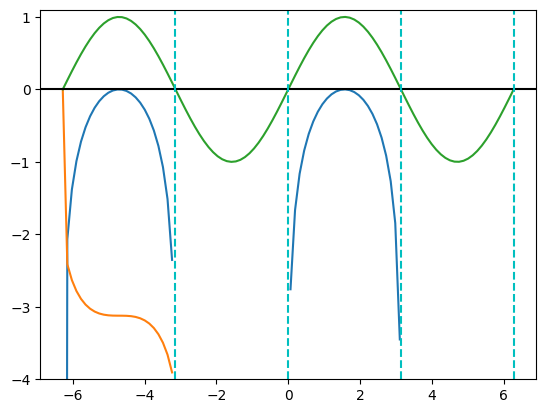

In [115]:
# vykreslen√≠ primitivn√≠ fce pomoc√≠ numerick√© metody
from scipy import integrate

def f(x):                                                   # definice funkce arccos(sin(x))
    return np.log(np.sin(x))

xs = np.linspace(-2*np.pi, 2*np.pi, 100)                    # testovac√≠ hodnoty x

#F_values = integrate.cumtrapz(f(xs), xs, initial=0)         # zastaral√° metoda
Fs = integrate.cumulative_trapezoid(f(xs), xs, initial=0)   # vypoƒçet primitivn√≠ funkce numericky

plt.plot(xs, f(xs))                                         # vykreslen√≠ f
plt.plot(xs, Fs)                                            # vykreslen√≠ F
plt.plot(xs, np.sin(xs))
plt.axhline(y=0, color='k')
for i in range(-1, 3):                                       # 5 p≈ô√≠mek v intervalu [0, 2*np.pi]
    plt.axvline(i*np.pi, color='c', linestyle='--')         # perioda pi

plt.ylim(-4,1.1)
plt.show()


#### SCv.11.2: Urƒçit√Ω integr√°l

Pomoc√≠ built-in funkc√≠ nebo metod numerick√© matematiky vypoƒç√≠tejte n√°sleduj√≠c√≠ urƒçit√© integr√°ly. Pou≈æijte alespo≈à t≈ôi r≈Øzn√© integraƒçn√≠ metody a porovnejte je mezi sebou z hlediska p≈ôesnosti v√Ωpoƒçtu.
$$
\int_{0}^{2\pi} \sin(x) {\rm d}x
$$

In [24]:
import numpy as np

def f(x):
    return np.sin(x)

a = 0
b = 2*np.pi
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
print("romberg: ", integrate.romberg(f, a, b))

trapezoid:  0.00014124579393251947
simpson:  0.00014066340514081377
romberg:  2.5648942582957195e-16


$$
\int_{0}^{1} \left[ x^2 - 2x + 6 \right] {\rm d}x
$$

In [25]:
import numpy as np

def f(x):
    return x**2 - 2*x + 6

a = 0
b = 1
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
print("romberg: ", integrate.romberg(f, a, b))

trapezoid:  5.335
simpson:  5.333333333333332
romberg:  5.333333333333333


$$
\int_0^{\pi/4} e^{3x}\sin(2x) {\rm d}x
$$

In [26]:
import numpy as np

def f(x):
    return np.exp(3*x)*np.sin(2*x)

a = 0
b = np.pi/4.
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
print("romberg: ", integrate.romberg(f, a, b))

trapezoid:  2.771455172001907
simpson:  2.7460056600827754
romberg:  2.5886286325075183


### Dom√°c√≠ cviƒçen√≠

#### DCv.11.1: Newtonovy-Cotesovy vzorce
Naprogramujte si zbyl√© Newtonovy-Cotesovy vzorce (Simpsonovo pravidlo, Simpsonovo 3/8 pravidlo, Booleovo pravidlo) sv√©pomoc√≠ a porovnejte jejich p≈ôesnost s lichobƒõ≈æn√≠kov√Ωm pravidlem. 

<img src="data/s11_nc.png" alt="Drawing" style="width: 600px;"/>

Kolik subinterval≈Ø pot≈ôebuj√≠ jednotliv√© metody, aby dos√°hly dostateƒçn√© p≈ôenosti?

#### DCv.11.2: Interpolace a integrace

N√°sleduj√≠c√≠ tabulka obsahuje sou≈ôadnice hranice pozemku v metrech. Pomoc√≠ lichobƒõ≈æn√≠kov√© integrace zjistƒõte rozlohu pozemku v metrech ƒçtvereƒçn√≠ch. Data tak√© naleznete v souboru pozemek.txt.

<table>
    <thead style="background-color:#444444;">
        <td>x</td><td>y</td>
    </thead>
    <tr>
        <td>0</td><td>125</td>
    </tr>
    <tr>
        <td>100</td><td>125</td>
    </tr>
    <tr>
        <td>200</td><td>120</td>
    </tr>
    <tr>
        <td>300</td><td>112</td>
    </tr>
    <tr>
        <td>400</td><td>90</td>
    </tr>
    <tr>
        <td>500</td><td>90</td>
    </tr>
    <tr>
        <td>600</td><td>95</td>
    </tr>
    <tr>
        <td>700</td><td>88</td>
    </tr>
    <tr>
        <td>800</td><td>75</td>
    </tr>
    <tr>
        <td>900</td><td>35</td>
    </tr>
    <tr>
        <td>1000</td><td>0</td>
    </tr>

</table>

#### DCv.11.3: Rombergova integrace

Jeden ze zp≈Øsob≈Ø jak zvƒõt≈°it p≈ôenost intergrace je Richardsonova extrapolace (RE). C√≠lem RE je zlep≈°it integraƒçn√≠ p≈ôenost eliminac√≠ chyb. Rombergova integrace (tak√© zn√°mo jako Rombergova kvadratura) je metoda, kter√° zlep≈°uje v√Ωsledek lichobƒõ≈æn√≠kov√© integrace odstranƒõn√≠m chyb Richardsonovou extrapolac√≠. Pochopen√≠ metody vy≈æaduje ment√°ln√≠ uchopen√≠ konceptu rekurze. Proƒçtƒõte si n√°sleduj√≠c√≠ zdroje a projdƒõte si k√≥d s implementovanou Rombergovou integrac√≠, kter√Ω jsme pro v√°s p≈ôipravili.

Zdroje k samostudiu: [CZ](http://physics.ujep.cz/~mlisal/nm_1/jskvor/PDF/IntegralRomberg.pdf) [EN](https://towardsdatascience.com/numerical-integration-romberg-integration-3f54002ab538)


$$ùëÜ(ùëõ,ùëö)=ùëÜ(ùëõ,ùëö‚àí1)+(ùëÜ(ùëõ,ùëö‚àí1)‚àíùëÜ(ùëõ‚àí1,ùëö‚àí1))/(4^ùëö‚àí1)$$


In [31]:
def romberg(a, b, i, j):
    if j == 0:
        n = 2**i
        dx = (b-a)/n
        return np.trapz(f(np.linspace(a, b, n)), dx=dx)
    if 0 < j <= i:
        return romberg(a, b, i, j-1) + (romberg(a, b, i, j-1) - romberg(a, b, i-1, j-1))/(4**j - 1)

print(romberg(a, b, i=10, j=5))

2.5870882254694396


#### V√Ωpoƒçet urƒçit√©ho integr√°lu metodou Monte Carlo

Jeliko≈æ Metodou Monte Carlo lze spoƒç√≠tat obsah nebo objem nƒõjak√© oblasti, lze s n√≠ spoƒç√≠tat i urƒçit√Ω integr√°l. Opakov√°n√≠ p≈ôedchoz√≠ metody tedy vede k my≈°lence:
1. vygeneruj n√°hodn√© sou≈ôadnice x a fx
2. zjisti, zda spadaj√≠ do oblasti, kterou funkce vytyƒçuje svou funkƒçn√≠ hodnotou nad/pod osou x
3. zapoƒçti nebo nezapoƒçti z√°sah
4. spoƒç√≠tej integr√°l jako obsah oblasti pomoc√≠ procenta z√°sah≈Ø a obsahu omezuj√≠c√≠ oblasti

Omezuj√≠c√≠ oblast spoƒç√≠t√°me jako obd√©ln√≠k, kter√Ω je ≈°i≈ôok√Ω jako definiƒçn√≠ obor a vysok√Ω jako obor hodnot. Zde se poƒç√≠t√° s t√≠m, ≈æe cel√Ω definiƒçn√≠ obor je spojit√Ω a stejnƒõ tak obor hodnot. Tento p≈ô√≠stup (tzv. rejection sampling metoda) bude v≈°ak znaƒçnƒõ nep≈ôesn√Ω a tak√© poƒç√≠t√° integr√°l v absolutn√≠ hodnotƒõ.

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

5.408


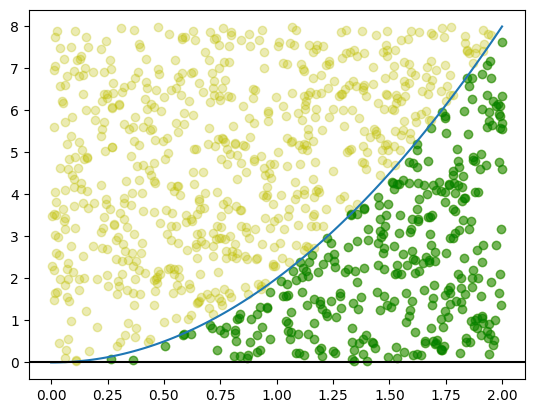

In [28]:
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    plt.plot(x, f(x))
    plt.axhline(y=0, color='k')

    condition = fxs < f(xs)
    xf = xs[condition]
    yf = fxs[condition]
    plt.scatter(xs, fxs, color='y', alpha=0.3)
    plt.scatter(xf, yf, color='g', alpha=0.5)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horn√≠ z√°vora
    xs = np.random.uniform(a, b, pocet_vzorku)              # n√°hodn√© hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # n√°hodn√© funkƒçn√≠ hodnoty (pro porovn√°n√≠)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spoƒç√≠t√° hodnoty pod k≈ôivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obd√©ln√≠ku

f=lambda x: 2*x**2
print(integral(a=0, b=2, f=f, pocet_vzorku=1000))
plt.show()

4.0104
0.639
0.6494399999999999


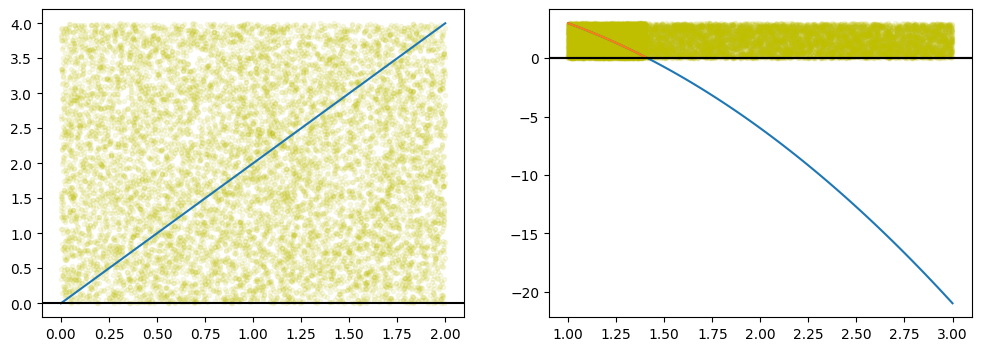

In [29]:
# p≈Øvodn√≠
i = 0                                                       # poƒçitadlo graf≈Ø
fig, axs = plt.subplots(1, 2, figsize=(12, 4))              # 12" ≈°√≠≈ôka, 4" v√Ω≈°ka
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horn√≠ z√°vora
    xs = np.random.uniform(a, b, pocet_vzorku)              # n√°hodn√© hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # n√°hodn√© funkƒçn√≠ hodnoty (pro porovn√°n√≠)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spoƒç√≠t√° hodnoty pod k≈ôivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obd√©ln√≠ku

# int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

# int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
print(integral(a=1, b=1.4, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
# pod osou y se p≈ô√≠spƒõvky neprojev√≠

plt.show()

3.9928
0.3329
0.6755999999324387
15.2736


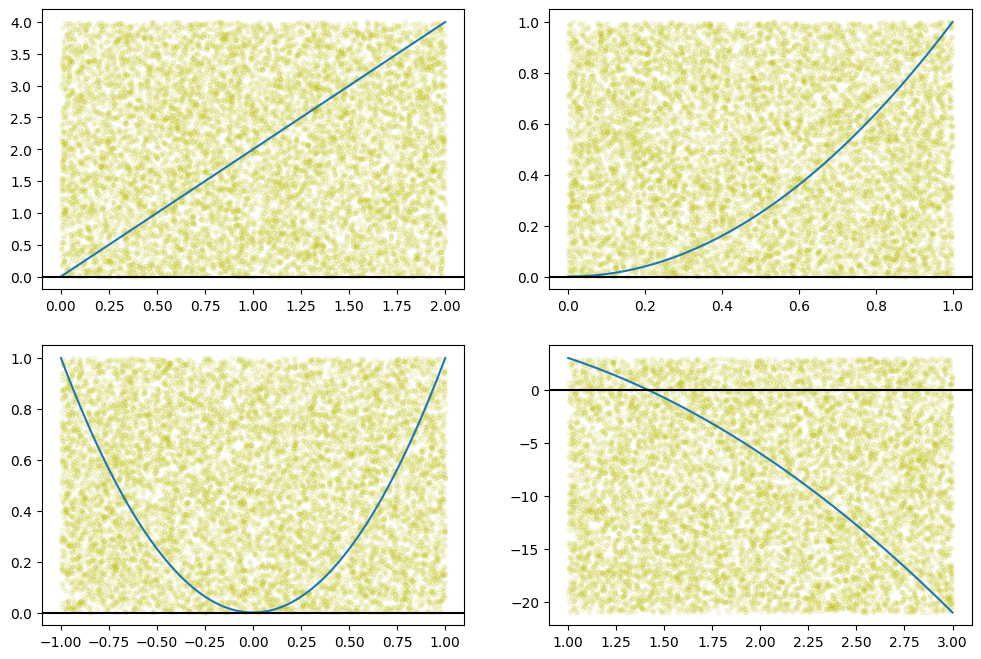

In [4]:
i = 0                                                       # poƒçitadlo graf≈Ø
fig, axs = plt.subplots(2, 2, figsize=(12, 8))              # 12" ≈°√≠≈ôka, 8" v√Ω≈°ka
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horn√≠ z√°vora
    min_f = min(f(np.linspace(a, b, 100000)))               # doln√≠ z√°vora
    xs = np.random.uniform(a, b, pocet_vzorku)              # n√°hodn√© hodnoty x (mezi a a b)
    fxs = np.random.uniform(min_f, max_f, pocet_vzorku)     # n√°hodn√© funkƒçn√≠ hodnoty (pro porovn√°n√≠)
    fx_in_domain = [fx for x, fx in zip(xs, fxs) if fx <= f(x) and fx>0 or fx >= f(x) and fx<0]
    hits = len(fx_in_domain)
    zobraz(a, b, f, xs, fxs)
    return (b-a)*(max_f-min_f)*hits/pocet_vzorku

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))

plt.show()

#### Cviƒçen√≠ 3: Integr√°l

Lep≈°√≠ ≈ôe≈°en√≠ je n√°hodnƒõ vzorkovat prostor $(x,fx)$ a spoƒç√≠tat pr≈Ømƒõrnou navzorkovanou funkƒçn√≠ hodnotu. Integr√°l se pak spoƒç√≠t√° jako plocha oblasti od A do B na ose x a 0 do stredni hodnoty z navzorkovan√Ωch hodnot na ose y.
$$
\overline{I}_n \equiv \frac{1}{n} \sum_{i=1}^{n}I_i = \frac{b-a}{n} \sum_{i=1}^{n}g(a+(b-a)U_i)
$$
<!--img src="MS8_soubory/integral.png" alt="Drawing" style="width: 600px;"/-->

Va≈°√≠m √∫kolem je naprogramovat v√Ωpoƒçet integr√°lu touto metodou.

6.146924929990662


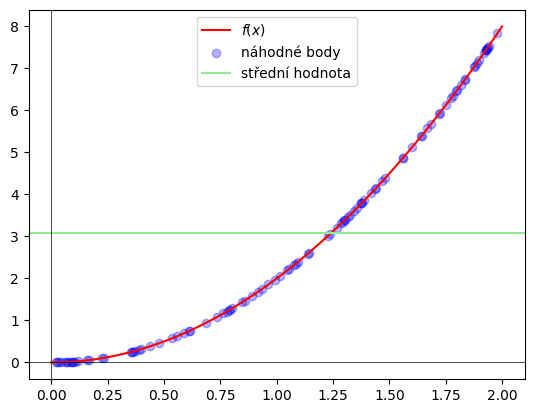

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs)), xs

f=lambda x: 2*x**2

integral_value, generated_xs = integral(a=0, b=2, f=f, n=100)
print(integral_value)

# Vytvo≈ôen√≠ grafu s vygenerovan√Ωmi body
plt.plot(np.linspace(0, 2, 100), f(np.linspace(0, 2, 100)), color='red', label='$f(x)$')
plt.scatter(generated_xs, f(generated_xs), color='blue', alpha=0.3, label='n√°hodn√© body')
plt.axhline(integral_value/(2-0), color = "lightgreen", label="st≈ôedn√≠ hodnota")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


In [ ]:
def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs))

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, n=10000))

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, n=10000))

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, n=10000))

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, n=10000))

4.00720589764762
0.3346285054764385
0.6685343062609723
-14.157649488481326
